# Data Cleaning
_Paul Torres & Albert Um - DS Flatiron cohort 06/22/20_ <br>
For the sake of efficiency, we divided the work by:
1. Split ALL columns
2. Each person works on their respective columns
3. Merge the joined columns
4. Feature Engineer independently and merge dataframes EOD(end of day)
5. Repeat step 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Work Flow:
_Split -> Merge(commit1) -> Split(commit1) -> Merge(commit2) -> ..._<br>
psam_p36.csv contains 196,967 rows and 286 columns<br>
<br>
The finished dataframe has 159,299 rows and 91 columns<br>
Rows with Age less than 17 have been dropped.

In [2]:
persons_columns = [
# 'RT',
 'SERIALNO',
#  'DIVISION',
#  'SPORDER',
#  'PUMA',
#  'REGION',
#  'ST',
#  'ADJINC',
#  'PWGTP',
 'AGEP',
 'CIT',
 'CITWP',
 'COW',
 'DDRS',
 'DEAR',
 'DEYE',
 'DOUT',
 'DPHY',
#  'DRAT',
#  'DRATX',
 'DREM',
 'ENG',
 'FER',
#  'GCL',
#  'GCM',
#  'GCR',
#  'HINS1',
#  'HINS2',
#  'HINS3',
#  'HINS4',
#  'HINS5',
#  'HINS6',
#  'HINS7',
 'INTP',
 'JWMNP',
#  'JWRIP',
 'JWTR',
 'LANX',
 'MAR',
 'MARHD',
 'MARHM',
 'MARHT',
 'MARHW',
 'MARHYP',
 'MIG',
 'MIL',
#  'MLPA',
#  'MLPB',
#  'MLPCD',
#  'MLPE',
#  'MLPFG',
#  'MLPH',
#  'MLPI',
#  'MLPJ',
#  'MLPK',
 'NWAB',
 'NWAV',
 'NWLA',
 'NWLK',
 'NWRE',
 'OIP',
 'PAP',
#  'RELP',
 'RETP',
 'SCH',
 'SCHG',
 'SCHL',
 'SEMP',
 'SEX',
 'SSIP',
 'SSP',
 'WAGP',
 'WKHP',
 'WKL',
 'WKW',
 'WRK',
 'YOEP',
 'ANC',
#  'ANC1P',
#  'ANC2P',
 'DECADE',
 'DIS',
#  'DRIVESP',
#  'ESP',
 'ESR',
#  'FOD1P',
#  'FOD2P',
 'HICOV',
 'HISP',
 'INDP',
#  'JWAP',
#  'JWDP',
#  'LANP',
#  'MIGPUMA',
#  'MIGSP',
 'MSP',
#  'NAICSP',
 'NATIVITY',
#  'NOP',
#  'OC',
 'OCCP',
 'PAOC',
 'PERNP',
 'PINCP',
#  'POBP',
 'POVPIP',
#  'POWPUMA',
#  'POWSP',
#  'PRIVCOV',
#  'PUBCOV',
 'QTRBIR',
 'RAC1P',
 'RAC2P',
 'RAC3P',
 'RACAIAN',
 'RACASN',
 'RACBLK',
 'RACNH',
 'RACNUM',
 'RACPI',
 'RACSOR',
 'RACWHT',
#  'RC',
 'SCIENGP',
 'SCIENGRLP',
#  'SFN',
#  'SFR',
#  'SOCP',
#  'VPS',
 'WAOB',
#  'FAGEP',
#  'FANCP',
#  'FCITP',
#  'FCITWP',
#  'FCOWP',
#  'FDDRSP',
#  'FDEARP',
#  'FDEYEP',
#  'FDISP',
#  'FDOUTP',
#  'FDPHYP',
#  'FDRATP',
#  'FDRATXP',
#  'FDREMP',
#  'FENGP',
#  'FESRP',
#  'FFERP',
#  'FFODP',
#  'FGCLP',
#  'FGCMP',
#  'FGCRP',
#  'FHICOVP',
#  'FHINS1P',
#  'FHINS2P',
#  'FHINS3C',
#  'FHINS3P',
#  'FHINS4C',
#  'FHINS4P',
#  'FHINS5C',
#  'FHINS5P',
#  'FHINS6P',
#  'FHINS7P',
#  'FHISP',
#  'FINDP',
#  'FINTP',
#  'FJWDP',
#  'FJWMNP',
#  'FJWRIP',
#  'FJWTRP',
#  'FLANP',
#  'FLANXP',
#  'FMARP',
#  'FMARHDP',
#  'FMARHMP',
#  'FMARHTP',
#  'FMARHWP',
#  'FMARHYP',
#  'FMIGP',
#  'FMIGSP',
#  'FMILPP',
#  'FMILSP',
#  'FOCCP',
#  'FOIP',
#  'FPAP',
#  'FPERNP',
#  'FPINCP',
#  'FPOBP',
#  'FPOWSP',
#  'FPRIVCOVP',
#  'FPUBCOVP',
#  'FRACP',
#  'FRELP',
#  'FRETP',
#  'FSCHGP',
#  'FSCHLP',
#  'FSCHP',
#  'FSEMP',
#  'FSEXP',
#  'FSSIP',
#  'FSSP',
#  'FWAGP',
#  'FWKHP',
#  'FWKLP',
#  'FWKWP',
#  'FWRKP',
#  'FYOEP',
#  'PWGTP1',
#  'PWGTP2',
#  'PWGTP3',
#  'PWGTP4',
#  'PWGTP5',
#  'PWGTP6',
#  'PWGTP7',
#  'PWGTP8',
#  'PWGTP9',
#  'PWGTP10',
#  'PWGTP11',
#  'PWGTP12',
#  'PWGTP13',
#  'PWGTP14',
#  'PWGTP15',
#  'PWGTP16',
#  'PWGTP17',
#  'PWGTP18',
#  'PWGTP19',
#  'PWGTP20',
#  'PWGTP21',
#  'PWGTP22',
#  'PWGTP23',
#  'PWGTP24',
#  'PWGTP25',
#  'PWGTP26',
#  'PWGTP27',
#  'PWGTP28',
#  'PWGTP29',
#  'PWGTP30',
#  'PWGTP31',
#  'PWGTP32',
#  'PWGTP33',
#  'PWGTP34',
#  'PWGTP35',
#  'PWGTP36',
#  'PWGTP37',
#  'PWGTP38',
#  'PWGTP39',
#  'PWGTP40',
#  'PWGTP41',
#  'PWGTP42',
#  'PWGTP43',
#  'PWGTP44',
#  'PWGTP45',
#  'PWGTP46',
#  'PWGTP47',
#  'PWGTP48',
#  'PWGTP49',
#  'PWGTP50',
#  'PWGTP51',
#  'PWGTP52',
#  'PWGTP53',
#  'PWGTP54',
#  'PWGTP55',
#  'PWGTP56',
#  'PWGTP57',
#  'PWGTP58',
#  'PWGTP59',
#  'PWGTP60',
#  'PWGTP61',
#  'PWGTP62',
#  'PWGTP63',
#  'PWGTP64',
#  'PWGTP65',
#  'PWGTP66',
#  'PWGTP67',
#  'PWGTP68',
#  'PWGTP69',
#  'PWGTP70',
#  'PWGTP71',
#  'PWGTP72',
#  'PWGTP73',
#  'PWGTP74',
#  'PWGTP75',
#  'PWGTP76',
#  'PWGTP77',
#  'PWGTP78',
#  'PWGTP79',
#  'PWGTP80'
]

In [3]:
import pandas as pd
df_al = pd.read_csv('psam_p36.csv', usecols=persons_columns)
# df_paul = pd.read_csv('psam_p36.csv')
df_al.shape

(196967, 75)

### Removing rows with ages less than 18

In [4]:
df_al = df_al.loc[df_al['AGEP'].gt(17)].copy(deep=True)

In [5]:
housing_columns = [
#     'RT',
 'SERIALNO',
#  'DIVISION',
#  'PUMA',
#  'REGION',
#  'ST',
#  'ADJHSG',
#  'ADJINC',
#  'WGTP',
 'NP',
 'TYPE',
 'ACCESS',
 'ACR',
#  'AGS',
 'BATH',
 'BDSP',
 'BLD',
 'BROADBND',
 'COMPOTHX',
#  'CONP',
#  'DIALUP',
#  'ELEFP',
 'ELEP',
 'FS',
#  'FULFP',
#  'FULP',
#  'GASFP',
#  'GASP',
 'HFL',
 'HISPEED',
#  'HOTWAT',
#  'INSP',
#  'LAPTOP',
#  'MHP',
#  'MRGI',
 'MRGP',
#  'MRGT',
#  'MRGX',
#  'OTHSVCEX',
 'REFR',
 'RMSP',
#  'RNTM',
 'RNTP',
 'RWAT',
 'RWATPR',
#  'SATELLITE',
 'SINK',
 'SMARTPHONE',
#  'SMP',
 'STOV',
 'TABLET',
 'TEL',
 'TEN',
#  'VACS',
 'VALP',
 'VEH',
 'WATFP',
#  'WATP',
#  'YBL',
 'FES',
 'FINCP',
 'FPARC',
 'GRNTP',
 'GRPIP',
 'HHL',
 'HHLANP',
 'HHT',
 'HINCP',
#  'HUGCL',
 'HUPAC',
 'HUPAOC',
 'HUPARC',
 'KIT',
 'LNGI',
#  'MULTG',
 'MV',
 'NOC',
#  'NPF',
#  'NPP',
 'NR',
 'NRC',
 'OCPIP',
 'PARTNER',
#  'PLM',
#  'PLMPRP',
#  'PSF',
 'R18',
 'R60',
 'R65',
#  'RESMODE',
 'SMOCP',
#  'SMX',
 'SRNT',
 'SSMC',
 'SVAL',
#  'TAXAMT',
 'WIF',
 'WKEXREL',
 'WORKSTAT',
#  'FACCESSP',
#  'FACRP',
#  'FAGSP',
#  'FBATHP',
#  'FBDSP',
#  'FBLDP',
#  'FBROADBNDP',
#  'FCOMPOTHXP',
#  'FCONP',
#  'FDIALUPP',
#  'FELEP',
#  'FFINCP',
#  'FFSP',
#  'FFULP',
#  'FGASP',
#  'FGRNTP',
#  'FHFLP',
#  'FHINCP',
#  'FHISPEEDP',
#  'FHOTWATP',
#  'FINSP',
#  'FKITP',
#  'FLAPTOPP',
#  'FMHP',
#  'FMRGIP',
#  'FMRGP',
#  'FMRGTP',
#  'FMRGXP',
#  'FMVP',
#  'FOTHSVCEXP',
#  'FPLMP',
#  'FPLMPRP',
#  'FREFRP',
#  'FRMSP',
#  'FRNTMP',
#  'FRNTP',
#  'FRWATP',
#  'FRWATPRP',
#  'FSATELLITEP',
#  'FSINKP',
#  'FSMARTPHONP',
#  'FSMOCP',
#  'FSMP',
#  'FSMXHP',
#  'FSMXSP',
#  'FSTOVP',
#  'FTABLETP',
#  'FTAXP',
#  'FTELP',
#  'FTENP',
#  'FVACSP',
#  'FVALP',
#  'FVEHP',
#  'FWATP',
#  'FYBLP',
#  'WGTP1',
#  'WGTP2',
#  'WGTP3',
#  'WGTP4',
#  'WGTP5',
#  'WGTP6',
#  'WGTP7',
#  'WGTP8',
#  'WGTP9',
#  'WGTP10',
#  'WGTP11',
#  'WGTP12',
#  'WGTP13',
#  'WGTP14',
#  'WGTP15',
#  'WGTP16',
#  'WGTP17',
#  'WGTP18',
#  'WGTP19',
#  'WGTP20',
#  'WGTP21',
#  'WGTP22',
#  'WGTP23',
#  'WGTP24',
#  'WGTP25',
#  'WGTP26',
#  'WGTP27',
#  'WGTP28',
#  'WGTP29',
#  'WGTP30',
#  'WGTP31',
#  'WGTP32',
#  'WGTP33',
#  'WGTP34',
#  'WGTP35',
#  'WGTP36',
#  'WGTP37',
#  'WGTP38',
#  'WGTP39',
#  'WGTP40',
#  'WGTP41',
#  'WGTP42',
#  'WGTP43',
#  'WGTP44',
#  'WGTP45',
#  'WGTP46',
#  'WGTP47',
#  'WGTP48',
#  'WGTP49',
#  'WGTP50',
#  'WGTP51',
#  'WGTP52',
#  'WGTP53',
#  'WGTP54',
#  'WGTP55',
#  'WGTP56',
#  'WGTP57',
#  'WGTP58',
#  'WGTP59',
#  'WGTP60',
#  'WGTP61',
#  'WGTP62',
#  'WGTP63',
#  'WGTP64',
#  'WGTP65',
#  'WGTP66',
#  'WGTP67',
#  'WGTP68',
#  'WGTP69',
#  'WGTP70',
#  'WGTP71',
#  'WGTP72',
#  'WGTP73',
#  'WGTP74',
#  'WGTP75',
#  'WGTP76',
#  'WGTP77',
#  'WGTP78',
#  'WGTP79',
#  'WGTP80'
                  ]

In [6]:
df_housing = pd.read_csv('psam_h36.csv', usecols=housing_columns)

In [7]:
df_merge = pd.merge(df_al, df_housing, on='SERIALNO')

In [8]:
def data_cleaning(_df):
    """
    section to handle missing values.
    """
    
    # Changing Year of Naturalization to Year's Naturalized by subtracting 2019 by value and 0 if null
    _df['CITWP'] = np.where(_df['CITWP'].isna(), 0, 2019 - _df['CITWP'])
    
    # changing missing class of workers to never worked
    _df['COW'] = np.where(_df['COW'].isna(), 10, _df['COW'])
    
    # Changing missing ability to speak english to speaks only english
    _df['ENG'] = np.where(_df['ENG'].isna(), 0, _df['ENG'])
    
    # Changing missing Gave birth to child within the past 12 months to not applicable
    _df['FER'] = np.where(_df['FER'].isna(), 3, _df['FER'])
    
    # Changing missing time to 0 for workers working from home AND not working
    _df['JWMNP'] = np.where(_df['JWMNP'].isna(), 0, _df['JWMNP'])
    
    # Missing Means of transportation to work into its own category
    _df['JWTR'] = np.where(_df['JWTR'].isna(), 12, _df['JWTR'])
    
    # Missing Divorced in the past 12 months to never married
    _df['MARHD'] = np.where(_df['MARHD'].isna(), 3, _df['MARHD'])
    
    # Missing Married in the past 12 months to never married
    _df['MARHM'] = np.where(_df['MARHM'].isna(), 3, _df['MARHM'])
    
    # Missing Number of times married to never married
    _df['MARHT'] = np.where(_df['MARHT'].isna(), 0, _df['MARHT'])
    
    # Missing Widowed in the past 12 months to never married
    _df['MARHW'] = np.where(_df['MARHW'].isna(), 3, _df['MARHW'])
    
    # Changing Year last married to Years Married by subtracting 2019 to year, 0 if never married
    _df['MARHYP'] = np.where(_df['MARHYP'].isna(), 0, 2019 - _df['MARHYP'])
    
    # Changing missing grade level attending to not attending school
    _df['SCHG'] = np.where(_df['SCHG'].isna(), 0, _df['SCHG'])
    
    # Missing Usual hours worked per week past 12 months to 0 and did not work
    _df['WKHP'] = np.where(_df['WKHP'].isna(), 0, _df['WKHP'])
    
    # Changing missing weeks worked past 12 months to did not work past 12 months
    # Please note I changed this value to 7 because on the dictionary key
    # The values decrease.. as in 1 = 50-52weeks, 2 = 48-49weeks, ... 6= less than 14 weeks
    _df['WKW'] = np.where(_df['WKW'].isna(), 7, _df['WKW'])
    
    # Changing missing worked last week to note reported
    _df['WRK'] = np.where(_df['WRK'].isna(), 3, _df['WRK'])
    
    # Changing Year of entry to Years since entered USA. If missing then born in 
    # the USA and I'll impute with the Age, else I'll subtract by 2019
    _df['YOEP'] = np.where(_df['YOEP'].isna(), _df['AGEP'], 2019 - _df['YOEP'])
    
    # Changing missing Decade of Entry to 0 as born in the US
    _df['DECADE'] = np.where(_df['DECADE'].isna(), 0, _df['DECADE'])
    
    
    # Changing missing field of degree to less than degree
    # Please note the codes are 4 digits and i have imputed code 1000 for
    # less than degree
#     _df['FOD1P'] = np.where(_df['FOD1P'].isna(), 1000, _df['FOD1P'])
    
    # Changing missing INDP to never worked
    conditions = [
        _df['INDP'].isin(range(170, 291)),
        _df['INDP'].isin(range(370, 491)),
        _df['INDP'].isin(range(570, 691)),
        _df['INDP'].isin([770]),
        _df['INDP'].isin(range(1070, 3991)),
        _df['INDP'].isin(range(4070, 4591)),
        _df['INDP'].isin(range(4670, 5791)),
        _df['INDP'].isin(range(6070, 6391)),
        _df['INDP'].isin(range(6470, 6781)),
        _df['INDP'].isin(range(6870, 7191)), # 10
        _df['INDP'].isin(range(7270, 7791)),
        _df['INDP'].isin(range(7860, 7891)),
        _df['INDP'].isin(range(7970, 8291)),
        _df['INDP'].isin(range(8370, 8471)),
        _df['INDP'].isin(range(8561, 8691)),
        _df['INDP'].isin(range(8770, 9291)),
        _df['INDP'].isin(range(9370, 9591)),
        _df['INDP'].isin(range(9670, 9871)),
        _df['INDP'].eq(9920) # 19
    ]
    # reordered industry code by lowest code = lowest % no insurance
    choices = [
        20, # AGR
        7, # EXT
        3, # UTL
        19, # CON
        11, # MFG
        10, # WHL
        15, # RET
        14, # TRN
        5, # INF
        6, # FIN
        13, # PRF
        4, # EDU
        8, # MED
        12, # SCA
        17, # ENT
        16, # SRV
        2, # ADM
        1, # Military
        18 # Unemployed
    ]
    _df['INDP'] = np.select(conditions, choices, 9)
    
    # Changing missing language spoken at home to be vacant or jail
#     _df['LANP'] = np.where(_df['LANP'].isna(), 0, _df['LANP'])
    
    # Changing missing industry classification to 100 for never worked
#     _df['NAICSP'] = np.where(_df['NAICSP'].isna(), 100, _df['NAICSP'])
    
    # Changing missing occupational code to 0 for never worked
    conditions = [
        _df['OCCP'].isin(range(10, 441)), # MGR
        _df['OCCP'].isin(range(500, 751)), # BUS
        _df['OCCP'].isin(range(800, 961)), # FIN
        _df['OCCP'].isin(range(1005, 1241)), # CMM
        _df['OCCP'].isin(range(1305, 1561)), # ENG
        _df['OCCP'].isin(range(1600, 1981)), # SCI
        _df['OCCP'].isin(range(2001, 2061)), # CMS
        _df['OCCP'].isin(range(2100, 2181)), # LGL
        _df['OCCP'].isin(range(2205, 2556)), # EDU
        _df['OCCP'].isin(range(2600, 2921)), # ENT 10
        _df['OCCP'].isin(range(3000, 3551)), # MED
        _df['OCCP'].isin(range(3601, 3656)), # HLS
        _df['OCCP'].isin(range(3700, 3961)), # PRT
        _df['OCCP'].isin(range(4000, 4161)), # EAT
        _df['OCCP'].isin(range(4200, 4256)), # CLN
        _df['OCCP'].isin(range(4330, 4656)), # PRS
        _df['OCCP'].isin(range(4700, 4966)), # SAL
        _df['OCCP'].isin(range(5000, 5941)), # OFF
        _df['OCCP'].isin(range(6005, 6131)), # FFF
        _df['OCCP'].isin(range(6200, 6766)), # CON #10
        _df['OCCP'].isin(range(6800, 6951)), # EXT
        _df['OCCP'].isin(range(7000, 7641)), # RPR
        _df['OCCP'].isin(range(7700, 8991)), # PRD
        _df['OCCP'].isin(range(9005, 9761)), # TRN
        _df['OCCP'].isin(range(9800, 9831)), # MIL
        _df['OCCP'].eq(9920) #26
    ]
    # readjusting order of occupation by lowest code = lowest % not insured
    choices = [
        13, # MGR1
        9, # BUS2
        5, # FIN3
        6, # CMM4
        3, # ENG5
        2, # SCI6
        12, #CMS7
        4, # LGL8
        11, # EDU9
        15, # ENT10
        7, # MED11
        18, # HLS12
        10, # PRT13
        25, # EAT14
        23, # CLN15
        21, #PRS16
        16, #SAL17
        12, # OFF18
        127, # FFF19
        26, # CON20
        17, # EXT21
        19, # RPR22
        20, # PRD23
        22, # TRN24
        1, # MIL25
        24 # UNE26
    ]
    _df['OCCP'] = np.select(conditions, choices, 14)
    
    # Changing missing presence and age of own children to male or jail
    _df['PAOC'] = np.where(_df['PAOC'].isna(), 5, _df['PAOC'])
    
    # changing missing income to pover ratio to 0
    _df['POVPIP'] = np.where(_df['POVPIP'].isna(), 0, _df['POVPIP'])
    
    # Changing field of degree and engineering missing to less than bachelors
    _df['SCIENGP'] = np.where(_df['SCIENGP'].isna(), 3, _df['SCIENGP'])
    
    # Chaning missing field of degree and engineering RELATED to less than bachelors
    _df['SCIENGRLP'] = np.where(_df['SCIENGRLP'].isna(), 3, _df['SCIENGRLP'])
    
    # changing missing Standard Occupational code to 0
#     _df['SOCP'] = np.where(_df['SOCP'].isna(), 0, _df['SOCP'])
    
    # Changing access to the internet missing to no
    _df['ACCESS'] = np.where(_df['ACCESS'].isna(), 3, _df['ACCESS'])
    
    # Changing missing lot size to not family home or mobile home
    _df['ACR'] = np.where(_df['ACR'].isna(), 0, _df['ACR'])
    
    # Changing missing bathroom to jail
    _df['BATH'] = np.where(_df['BATH'].isna(), 2, _df['BATH'])
    
    # Changing missing bedrooms to 0 (GQ: jail)
    _df['BDSP'] = np.where(_df['BDSP'].isna(), 3, _df['BDSP'])
    
    # Changing missing units in structure to GQ
    _df['BLD'] = np.where(_df['BLD'].isna(), 11, _df['BLD'])
    
    # Changing Cellular data for smartphone missing to no
    _df['BROADBND'] = np.where(_df['BROADBND'].isna(), 3, _df['BROADBND'])
    
    # Changing Other Computer Equipment to GQ or vacant
    _df['COMPOTHX'] = np.where(_df['COMPOTHX'].isna(), 3, _df['COMPOTHX'])
    
    # Changing missing electrcity cost to 0
    _df['ELEP'] = np.where(_df['ELEP'].isna(), 0, _df['ELEP'])
    
    # Changing missing House heating fuel to GQ or vacant
    _df['HFL'] = np.where(_df['HFL'].isna(), 10, _df['HFL'])
    
    # Changing missing high speed internet to No
    _df['HISPEED'] = np.where(_df['HISPEED'].isna(), 3, _df['HISPEED'])
    
    # Changing missing first mortgage payments to 0
    _df['MRGP'] = np.where(_df['MRGP'].isna(), 0, _df['MRGP'])
    
    # Changing missing Refrigerator to GQ
    _df['REFR'] = np.where(_df['REFR'].isna(), 3, _df['REFR'])
    
    # Changing missing number of rooms to 0
    _df['RMSP'] = np.where(_df['RMSP'].isna(), 0, _df['RMSP'])
    
    # Changing missing Rent payments to 0
    _df['RNTP'] = np.where(_df['RNTP'].isna(), 0, _df['RNTP'])
    
    # Changing missing running hot/cold water to GQ
    _df['RWAT'] = np.where(_df['RWAT'].isna(), 3, _df['RWAT'])
    
    # Changing missing running water to GQ
    _df['RWATPR'] = np.where(_df['RWATPR'].isna(), 3, _df['RWATPR'])
    
    # Changing missing sink with a faucet to GQ
    _df['SINK'] = np.where(_df['SINK'].isna(), 3, _df['SINK'])
    
    # Changing missing smartphone to no
    _df['SMARTPHONE'] = np.where(_df['SMARTPHONE'].isna(), 2, _df['SMARTPHONE'])
    
    # Changing missing stoves to GQ
    _df['STOV'] = np.where(_df['STOV'].isna(), 3, _df['STOV'])
    
    # Changing missing tablets to GQ
    _df['TABLET'] = np.where(_df['TABLET'].isna(), 3, _df['TABLET'])
    
    #Changing missing telephone service to GQ
    _df['TEL'] = np.where(_df['TEL'].isna(), 3, _df['TEL'])
    
    # Changing missing tenure to GQ
    _df['TEN'] = np.where(_df['TEN'].isna(), 5, _df['TEN'])
    
    #Changing missing property value to 0
    _df['VALP'] = np.where(_df['VALP'].isna(), 0, _df['VALP'])
    
    # Changing missing vehiciles available to 0
    _df['VEH'] = np.where(_df['VEH'].isna(), 0, _df['VEH'])
    
    # Changing Missing water cost to GQ
    _df['WATFP'] = np.where(_df['WATFP'].isna(), 0, _df['WATFP'])
    
    # Changing missing family type and employment status to Other.. GQ not family/ samesex combined
    _df['FES'] = np.where(_df['FES'].isna(), 0, _df['FES'])
    
    # Changing missing family income to 0
    _df['FINCP'] = np.where(_df['FINCP'].isna(), 0, _df['FINCP'])
    
    # Changing missing family presence to GQ or not a family
    _df['FPARC'] = np.where(_df['FPARC'].isna(), 0, _df['FPARC'])
    
    # Changing missing gross rent to 0
    _df['GRNTP'] = np.where(_df['GRNTP'].isna(), 0, _df['GRNTP'])
    
    # Changing missing Gross rent as percentage of household to 0
    _df['GRPIP'] = np.where(_df['GRPIP'].isna(), 0, _df['GRPIP'])
    
    # Changing missing household language to GQ
    _df['HHL'] = np.where(_df['HHL'].isna(), 0, _df['HHL'])
    
    # Changing missing detailed household language to GQ
    _df['HHLANP'] = np.where(_df['HHLANP'].isna(), 0, _df['HHLANP'])
    
    # changing missing household fmaily type to GQ
    _df['HHT'] = np.where(_df['HHT'].isna(), 0, _df['HHT'])
    
    # Changing missing household income to 0
    _df['HINCP'] = np.where(_df['HINCP'].isna(), 0, _df['HINCP'])
    
    # Changing missing household presence and age of children to GQ
    _df['HUPAC'] = np.where(_df['HUPAC'].isna(), 0, _df['HUPAC'])
    
    # Changing missing household presence and age of own children to GQ
    _df['HUPAOC'] = np.where(_df['HUPAOC'].isna(), 0, _df['HUPAOC'])
    
    # Changing missing household presence and age of related children to GQ
    _df['HUPARC'] = np.where(_df['HUPARC'].isna(), 0, _df['HUPARC'])
    
    # Changing missing complete kitchen facilities to GQ
    _df['KIT'] = np.where(_df['KIT'].isna(), 0, _df['KIT'])
    
    # Changing missing limited english speaking household to... you guessed it GQ
    _df['LNGI'] = np.where(_df['LNGI'].isna(), 0, _df['LNGI'])
    
    # Changing missing when moved into house or apartment
    _df['MV'] = np.where(_df['MV'].isna(), 0, _df['MV'])
    
    # Changing missing number of children in household to 0
    _df['NOC'] = np.where(_df['NOC'].isna(), 0, _df['NOC'])
    
    # Changing missing presence of nonrelative in household to GQ
    _df['NR'] = np.where(_df['NR'].isna(), 2, _df['NR'])
    
    # changing number of related children in household to 0
    _df['NRC'] = np.where(_df['NRC'].isna(), 0, _df['NRC'])
    
    # Changing missing monthly owner costs as a percentage to income to 0
    _df['OCPIP'] = np.where(_df['OCPIP'].isna(), 0, _df['OCPIP'])
    
    # Changing missing unmarried partnerhousehold to GQ
    _df['PARTNER'] = np.where(_df['PARTNER'].isna(), 5, _df['PARTNER'])
    
    # Changing missing presence of persons under 18 to GQ
    _df['R18'] = np.where(_df['R18'].isna(), 2, _df['R18'])
    
    # Changing missing presence of persons over 60 to GQ
    _df['R60'] = np.where(_df['R60'].isna(), 3, _df['R60'])
    
    # Changing missing presence of persons over 65 to GQ
    _df['R65'] = np.where(_df['R65'].isna(), 3, _df['R65'])
    
    # Changing monthly owners costs to 0 for missing
    _df['SMOCP'] = np.where(_df['SMOCP'].isna(), 0, _df['SMOCP'])
    
    # Changing missing specified rental unit to OTHER
    _df['SRNT'] = np.where(_df['SRNT'].isna(), 2, _df['SRNT'])
    
    # Changing missing same sex married couples to GQ
    _df['SSMC'] = np.where(_df['SSMC'].isna(), 3, _df['SSMC'])
    
    # Changing missing specified owner unit to OTHER
    _df['SVAL'] = np.where(_df['SVAL'].isna(), 2, _df['SVAL'])
    
    # Changing missing workers in family during pas 12 months to 0
    _df['WIF'] = np.where(_df['WIF'].isna(), 0, _df['WIF'])
    
    # Changing missing work experience of householder to other
    _df['WKEXREL'] = np.where(_df['WKEXREL'].isna(), 0, _df['WKEXREL'])
    
    # Changing missing work status of householder to other
    _df['WORKSTAT'] = np.where(_df['WORKSTAT'].isna(), 0, _df['WORKSTAT'])
    
    # converting No insurance to 0 and has to 1
    _df['HICOV'] = np.where(_df['HICOV'].eq(2), 0, 1)
    
    
    return _df

In [9]:
df_merge = data_cleaning(df_merge)

In [10]:
df_merge.isna().sum()

SERIALNO    0
AGEP        0
CIT         0
CITWP       0
COW         0
           ..
SSMC        0
SVAL        0
WIF         0
WKEXREL     0
WORKSTAT    0
Length: 133, dtype: int64

In [11]:
df_merge.drop(columns=['SERIALNO'], inplace=True)

In [12]:
pd.set_option('display.max_columns', 150)

In [13]:
df_merge

,AGEP,CIT,CITWP,COW,DDRS,DEAR,DEYE,DOUT,DPHY,DREM,ENG,FER,INTP,JWMNP,JWTR,LANX,MAR,MARHD,MARHM,MARHT,MARHW,MARHYP,MIG,MIL,NWAB,NWAV,NWLA,NWLK,NWRE,OIP,PAP,RETP,SCH,SCHG,SCHL,SEMP,SEX,SSIP,SSP,WAGP,WKHP,WKL,WKW,WRK,YOEP,ANC,DECADE,DIS,ESR,HICOV,HISP,INDP,MSP,NATIVITY,OCCP,PAOC,PERNP,PINCP,POVPIP,QTRBIR,RAC1P,RAC2P,RAC3P,RACAIAN,RACASN,RACBLK,RACNH,RACNUM,RACPI,RACSOR,RACWHT,SCIENGP,SCIENGRLP,WAOB,NP,TYPE,ACCESS,ACR,BATH,BDSP,BLD,BROADBND,COMPOTHX,ELEP,FS,HFL,HISPEED,MRGP,REFR,RMSP,RNTP,RWAT,RWATPR,SINK,SMARTPHONE,STOV,TABLET,TEL,TEN,VALP,VEH,WATFP,FES,FINCP,FPARC,GRNTP,GRPIP,HHL,HHLANP,HHT,HINCP,HUPAC,HUPAOC,HUPARC,KIT,LNGI,MV,NOC,NR,NRC,OCPIP,PARTNER,R18,R60,R65,SMOCP,SRNT,SSMC,SVAL,WIF,WKEXREL,WORKSTAT
0,26,5,0.0,2.0,2.0,2,2,2.0,2.0,2.0,1.0,2.0,0.0,0.0,12.0,1.0,5,3.0,3.0,0.0,3.0,0.0,1.0,4.0,3.0,5.0,3.0,3.0,3.0,0.0,0.0,0.0,3.0,16.0,21.0,0.0,2,0.0,0.0,5200.0,50.0,1.0,6.0,3.0,2.0,1,8.0,2,6.0,1,1,4,6.0,2,12,5.0,5200.0,5200.0,0.0,4,1,1,1,0,0,0,0,1,0,0,1,1.0,2.0,5,1,3,3.0,0.0,2.0,3.0,11.0,3.0,3.0,0.0,2.0,10.0,3.0,0.0,3.0,0.0,0.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,5.0,2.0,3.0,3.0,0.0,2.0,3.0,2.0,0.0,0.0,0.0
1,21,1,0.0,1.0,2.0,2,2,2.0,2.0,2.0,0.0,3.0,0.0,2.0,10.0,2.0,5,3.0,3.0,0.0,3.0,0.0,3.0,4.0,3.0,5.0,3.0,3.0,3.0,0.0,0.0,0.0,2.0,15.0,20.0,0.0,1,0.0,0.0,1000.0,2.0,1.0,5.0,1.0,21.0,1,0.0,2,1.0,1,1,17,6.0,1,25,5.0,1000.0,1000.0,0.0,2,1,1,1,0,0,0,0,1,0,0,1,3.0,3.0,1,1,3,3.0,0.0,2.0,3.0,11.0,3.0,3.0,0.0,2.0,10.0,3.0,0.0,3.0,0.0,0.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,5.0,2.0,3.0,3.0,0.0,2.0,3.0,2.0,0.0,0.0,0.0
2,18,2,0.0,1.0,2.0,2,2,2.0,2.0,2.0,1.0,2.0,0.0,0.0,12.0,1.0,5,3.0,3.0,0.0,3.0,0.0,3.0,4.0,2.0,5.0,2.0,2.0,2.0,0.0,0.0,0.0,2.0,15.0,16.0,0.0,2,0.0,0.0,0.0,0.0,2.0,7.0,2.0,18.0,1,7.0,2,6.0,1,2,17,6.0,1,16,5.0,0.0,0.0,0.0,3,8,67,15,0,0,0,0,1,0,1,0,3.0,3.0,2,1,3,3.0,0.0,2.0,3.0,11.0,3.0,3.0,0.0,1.0,10.0,3.0,0.0,3.0,0.0,0.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,5.0,2.0,3.0,3.0,0.0,2.0,3.0,2.0,0.0,0.0,0.0
3,85,1,0.0,10.0,1.0,1,2,2.0,1.0,1.0,0.0,3.0,0.0,0.0,12.0,2.0,2,2.0,2.0,1.0,2.0,69.0,1.0,4.0,3.0,5.0,3.0,3.0,3.0,0.0,0.0,0.0,1.0,0.0,16.0,0.0,2,0.0,13700.0,0.0,0.0,3.0,7.0,3.0,85.0,4,0.0,1,6.0,1,1,9,3.0,1,14,5.0,0.0,13700.0,0.0,3,1,1,1,0,0,0,0,1,0,0,1,3.0,3.0,1,1,2,3.0,0.0,2.0,3.0,11.0,3.0,3.0,0.0,2.0,10.0,3.0,0.0,3.0,0.0,0.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,5.0,2.0,3.0,3.0,0.0,2.0,3.0,2.0,0.0,0.0,0.0
4,19,1,0.0,1.0,2.0,2,2,2.0,2.0,2.0,0.0,2.0,0.0,5.0,1.0,2.0,5,3.0,3.0,0.0,3.0,0.0,1.0,4.0,3.0,5.0,3.0,3.0,3.0,0.0,0.0,0.0,3.0,15.0,19.0,0.0,2,0.0,0.0,870.0,4.0,1.0,5.0,1.0,19.0,2,0.0,2,1.0,1,1,17,6.0,1,15,5.0,870.0,870.0,0.0,4,1,1,1,0,0,0,0,1,0,0,1,3.0,3.0,1,1,3,3.0,0.0,2.0,3.0,11.0,3.0,3.0,0.0,2.0,10.0,3.0,0.0,3.0,0.0,0.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,5.0,2.0,3.0,3.0,0.0,2.0,3.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159294,36,1,0.0,1.0,2.0,2,2,2.0,2.0,2.0,0.0,2.0,0.0,45.0,4.0,2.0,1,2.0,2.0,1.0,2.0,8.0,1.0,4.0,3.0,5.0,3.0,3.0,3.0,0.0,0.0,0.0,1.0,0.0,22.0,0.0,2,0.0,0.0,90000.0,40.0,1.0,1.0,1.0,36.0,1,0.0,2,1.0,1,1,5,1.0,1,6,1.0,90000.0,90000.0,501.0,1,1,1,1,0,0,0,0,1,0,0,1,2.0,2.0,1,3,1,1.0,0.0,1.0,1.0,8.0,1.0,2.0,50.0,2

In [14]:
continuous_columns = ['AGEP', 'CITWP', 'INTP', 'JWMNP', 'MARHYP', 'OIP', 'PAP', 'RETP', 'SEMP', 'SSIP', 'SSP', 'WAGP', 'WKHP', 'YOEP', 'PERNP',
                     'PINCP', 'POVPIP', 'NP', 'BDSP', 'ELEP', 'MRGP', 'RMSP', 'RNTP', 'VALP', 'WATFP', 'FINCP', 'GRNTP', 'GRPIP', 'HINCP', 'NOC',
                     'NRC', 'OCPIP', 'SMOCP']

In [15]:
df_merge[continuous_columns]

,AGEP,CITWP,INTP,JWMNP,MARHYP,OIP,PAP,RETP,SEMP,SSIP,SSP,WAGP,WKHP,YOEP,PERNP,PINCP,POVPIP,NP,BDSP,ELEP,MRGP,RMSP,RNTP,VALP,WATFP,FINCP,GRNTP,GRPIP,HINCP,NOC,NRC,OCPIP,SMOCP
0,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5200.0,50.0,2.0,5200.0,5200.0,0.0,1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,2.0,21.0,1000.0,1000.0,0.0,1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,85,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,13700.0,0.0,0.0,85.0,0.0,13700.0,0.0,1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,870.0,4.0,19.0,870.0,870.0,0.0,1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159294,36,0.0,0.0,45.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,90000.0,40.0,36.0,90000.0,90000.0,501.0,3,1.0,50.0,0.0,3.0,1700.0,0.0,1.0,220000.0,1780.0,10.0,220000.0,1.0,1.0,0.0,0.0
159295,38,0.0,0.0,40.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,130000.0,40.0,38.0,130000.0,130000.0,501.0,3,1.0,50.0,0.0,3.0,1700.0,0.0,1.0,220000.0,1780.0,10.0,220000.0,1.0,1.0,0.0,0.0
159296,27,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42000.0,45.0,27.0,42000.0,42000.0,332.0,3,2.0,230.0,2200.0,4.0,0.0,400000.0,2.0,64000.0,0.0,0.0,64000.0,0.0,0.0,50.0,2660.0
159297,56,20.0,0.0,45.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,22000.0,45.0,11.0,22000.0,22000.0,332.0,3,2.0,230.0,2200.0,4.0,0.0,400000.0,2.0,64000.0,0.0,0.0,64000.0,0.0,0.0,50.0,2660.0


In [16]:
df_merge['HICOV'].value_counts(normalize=True)

1    0.949912
0    0.050088
Name: HICOV, dtype: float64

Text(0.5, 1.0, 'Percentage of Residents NOT having Health Insurance')

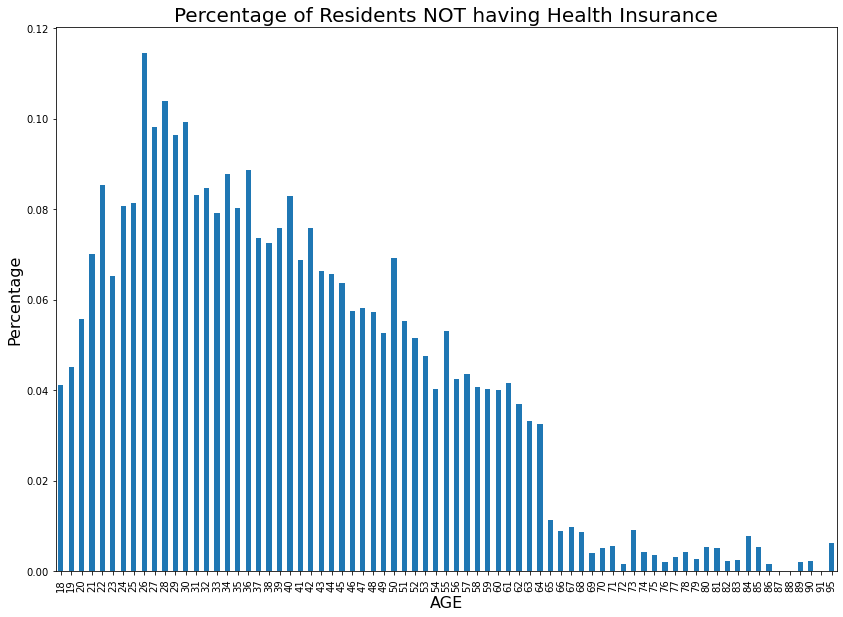

In [22]:
pd.set_option('display.max_rows', 150)
_unstack = df_merge.groupby(['AGEP'])['HICOV'].value_counts(normalize=True).unstack()
fig, ax = plt.subplots(figsize=(14,10))
_unstack.loc[:,0].plot(kind='bar',ax =ax)
ax.set_xlabel('AGE', fontsize=16)
ax.set_ylabel('Percentage', fontsize=16)
ax.set_title('Percentage of Residents NOT having Health Insurance', fontsize= 20)

In [25]:
df_merge.groupby(['INDP'])['HICOV'].value_counts(normalize=True).unstack().sort_values(by=0)

HICOV,0,1
INDP,,
18,0.003436,0.996564
17,0.016834,0.983166
3,0.019255,0.980745
12,0.021080,0.978920
9,0.026298,0.973702
10,0.032537,0.967463
2,0.033708,0.966292
13,0.034733,0.965267
20,0.036644,0.963356


In [27]:
_unstack.loc[:,0].sort_values()

INDP
18    0.003436
17    0.016834
3     0.019255
12    0.021080
9     0.026298
10    0.032537
2     0.033708
13    0.034733
20    0.036644
6     0.047619
5     0.048732
14    0.050362
11    0.051194
8     0.061472
7     0.065395
16    0.089531
15    0.100351
19    0.124524
4     0.132796
1     0.139037
Name: 0, dtype: float64

(0.0, 1.0)

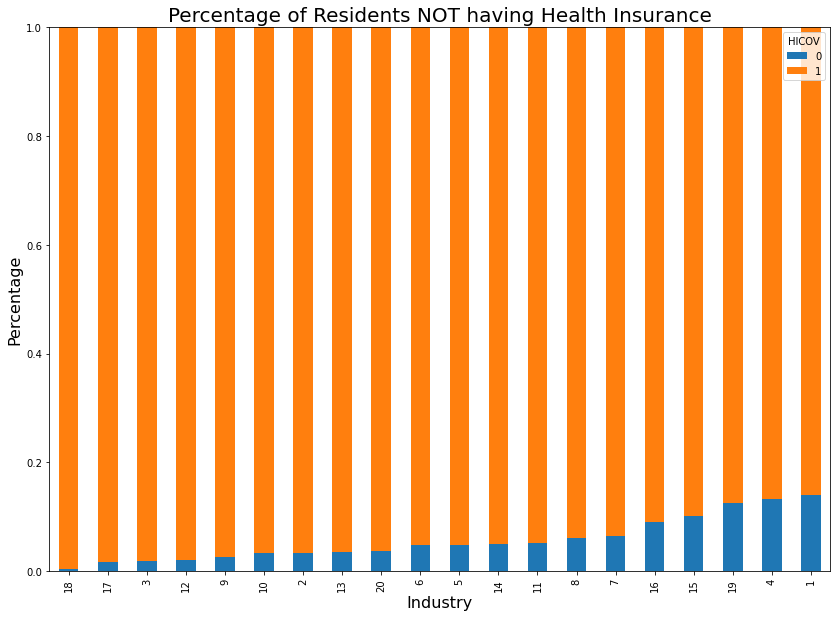

In [64]:
pd.set_option('display.max_rows', 150)
_unstack = df_merge.groupby(['INDP'])['HICOV'].value_counts(normalize=True).unstack()
# _unstack
fig, ax = plt.subplots(figsize=(14,10))
_unstack.sort_values(by=0).plot(kind='bar',ax =ax, stacked=True)
ax.set_xlabel('Industry', fontsize=16)
ax.set_ylabel('Percentage', fontsize=16)
ax.set_title('Percentage of Residents NOT having Health Insurance', fontsize= 20)
ax.set_ylim(0,1)

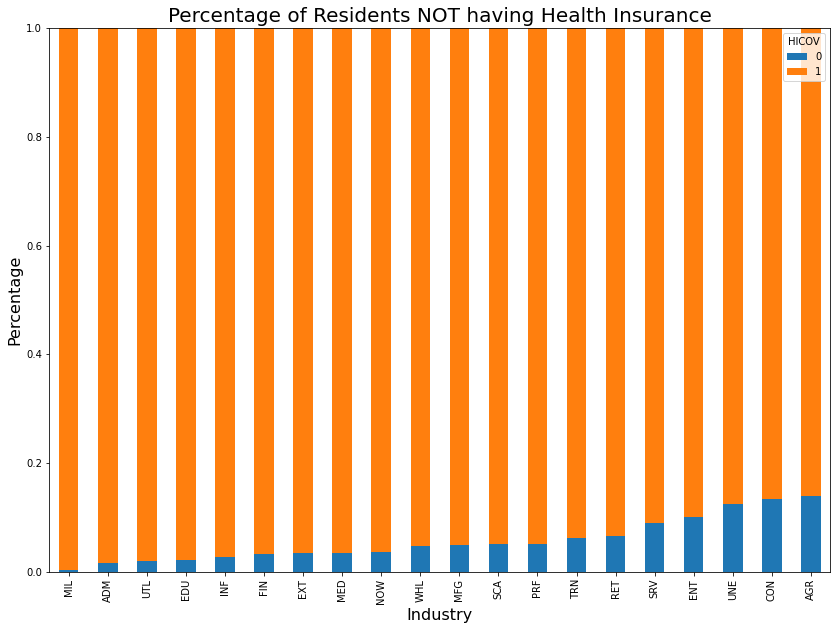

In [46]:
pd.set_option('display.max_rows', 150)
_unstack = df_merge.groupby(['INDP'])['HICOV'].value_counts(normalize=True).unstack()
# _unstack
fig, ax = plt.subplots(figsize=(14,10))
_unstack.sort_values(by=0).plot(kind='bar',ax =ax, stacked=True)
ax.set_xlabel('Industry', fontsize=16)
ax.set_ylabel('Percentage', fontsize=16)
ax.set_title('Percentage of Residents NOT having Health Insurance', fontsize= 20)
ax.set_ylim(0,1)
ax.set_xticklabels(['MIL', 'ADM', 'UTL', 'EDU', 'INF', 'FIN', 'EXT', 'MED', 'NOW', 'WHL',
             'MFG', 'SCA', 'PRF', 'TRN', 'RET', 'SRV', 'ENT', 'UNE', 'CON', 'AGR']);

In [61]:
df_merge.groupby(['SSP'])['HICOV'].value_counts(normalize=True)

SSP      HICOV
0.0      1        0.934810
         0        0.065190
10.0     1        1.000000
20.0     1        1.000000
40.0     1        0.888889
                    ...   
29600.0  1        1.000000
29700.0  1        1.000000
29800.0  1        1.000000
29900.0  1        1.000000
35000.0  1        1.000000
Name: HICOV, Length: 456, dtype: float64

In [56]:
df_merge.loc[df_merge['SSP'].eq(0)]['HICOV'].value_counts(normalize=True)

1    0.93481
0    0.06519
Name: HICOV, dtype: float64

In [58]:
df_merge.loc[df_merge['SSP'].gt(0)]['HICOV'].value_counts(normalize=True)

1    0.996756
0    0.003244
Name: HICOV, dtype: float64

(array([123308.,   2721.,   6368.,   6935.,   6694.,   5529.,   3921.,
          1849.,    566.,   1408.]),
 array([    0.,  3500.,  7000., 10500., 14000., 17500., 21000., 24500.,
        28000., 31500., 35000.]),
 <a list of 10 Patch objects>)

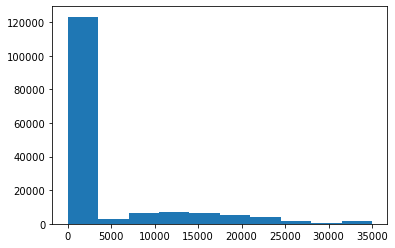

In [63]:
plt.hist(df_merge['SSP'])

In [67]:
_unstack.sort_values(by=0)

HICOV,0,1
OCCP,,
25,0.005714,0.994286
6,0.010050,0.989950
5,0.017480,0.982520
8,0.021081,0.978919
3,0.021144,0.978856
4,0.021325,0.978675
9,0.023587,0.976413
11,0.024594,0.975406
2,0.024659,0.975341


Text(0.5, 1.0, 'Percentage of Occupation Class having Insurance')

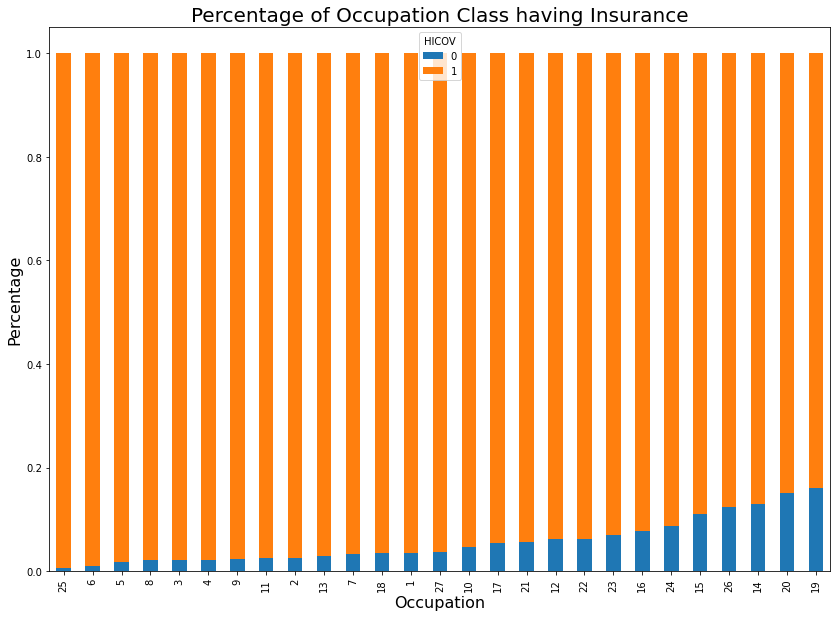

In [65]:
pd.set_option('display.max_rows', 150)
_unstack = df_merge.groupby(['OCCP'])['HICOV'].value_counts(normalize=True).unstack()
# _unstack
fig, ax = plt.subplots(figsize=(14,10))
_unstack.sort_values(by=0).plot(kind='bar',ax =ax, stacked=True)
ax.set_xlabel('Occupation', fontsize=16)
ax.set_ylabel('Percentage', fontsize=16)
ax.set_title('Percentage of Occupation Class having Insurance', fontsize= 20)

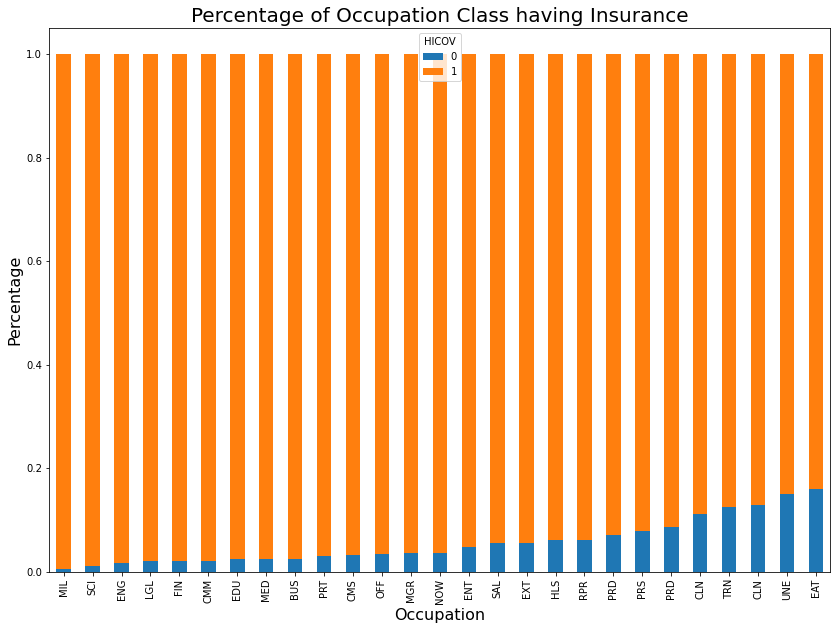

In [63]:
pd.set_option('display.max_rows', 150)
_unstack = df_merge.groupby(['OCCP'])['HICOV'].value_counts(normalize=True).unstack()
# _unstack
fig, ax = plt.subplots(figsize=(14,10))
_unstack.sort_values(by=0).plot(kind='bar',ax =ax, stacked=True)
ax.set_xlabel('Occupation', fontsize=16)
ax.set_ylabel('Percentage', fontsize=16)
ax.set_title('Percentage of Occupation Class having Insurance', fontsize= 20)
ax.set_xticklabels(['MIL', 'SCI', 'ENG', 'LGL', 'FIN', 'CMM', 'EDU', 'MED', 'BUS',
                   'PRT', 'CMS', 'OFF', 'MGR', 'NOW', 'ENT', 'SAL', 'EXT', 'HLS',
                   'RPR', 'PRD', 'PRS', 'PRD', 'CLN', 'TRN', 'CLN', 'UNE', 'EAT',
                   'CON', 'FFF']);

In [66]:
df_merge.loc[(df_merge['SSP'].gt(5000)) & (df_merge['AGEP'].lt(65))]['HICOV'].value_counts()

1    4957
0      93
Name: HICOV, dtype: int64

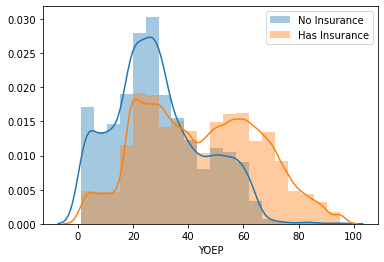

In [73]:
sns.distplot(df_merge.loc[df_merge['HICOV'].eq(0)]['YOEP'], bins=20, label='No Insurance')
sns.distplot(df_merge.loc[df_merge['HICOV'].eq(1)]['YOEP'], bins=20, label='Has Insurance')
plt.legend()

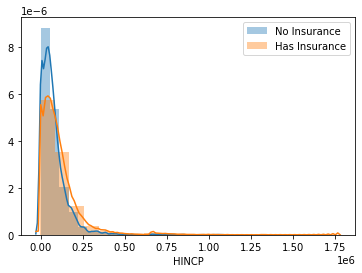

In [74]:
sns.distplot(df_merge.loc[df_merge['HICOV'].eq(0)]['HINCP'], bins=20, label='No Insurance')
sns.distplot(df_merge.loc[df_merge['HICOV'].eq(1)]['HINCP'], bins=20, label='Has Insurance')
plt.legend()

In [ ]:
bbb

In [127]:
import xgboost as xgb

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from lightgbm import LGBMClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, Flatten

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, plot_confusion_matrix
from sklearn.dummy import DummyClassifier
import pickle
import optuna

In [17]:
import tensorflow_addons as tfa

In [18]:
df_merge.isna().sum().sum()

0

In [20]:
from imblearn.over_sampling import SMOTE

In [20]:
# changing hicov values 1 = Health Insurance, 0 = No health Insurance


In [19]:
X = df_merge.drop(columns=['HICOV'])
y = df_merge['HICOV']

continuous_columns = ['AGEP', 'CITWP', 'INTP', 'JWMNP', 'MARHYP', 'OIP', 'PAP', 'RETP', 'SEMP', 'SSIP', 'SSP', 'WAGP', 'WKHP', 'YOEP', 'PERNP',
                     'PINCP', 'POVPIP', 'NP', 'BDSP', 'ELEP', 'MRGP', 'RMSP', 'RNTP', 'VALP', 'WATFP', 'FINCP', 'GRNTP', 'GRPIP', 'HINCP', 'NOC',
                    'NRC', 'OCPIP', 'SMOCP']
categorical_columns = [x for x in X.columns if x not in continuous_columns]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
y_train.value_counts()

1    121014
0      6425
Name: HICOV, dtype: int64

In [22]:
keras_X_train, keras_X_valid, keras_y_train, keras_y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [23]:
ohe = OneHotEncoder(handle_unknown='ignore')
_X_train_ohe = ohe.fit_transform(keras_X_train[categorical_columns]).toarray()
_X_train_ohe_df = pd.DataFrame(data = _X_train_ohe,
                               index = keras_X_train.index,
                               columns = ohe.get_feature_names(categorical_columns))

_X_test_ohe = ohe.transform(keras_X_valid[categorical_columns]).toarray()
_X_test_ohe_df = pd.DataFrame(data = _X_test_ohe,
                              index= keras_X_valid.index,
                              columns = ohe.get_feature_names(categorical_columns))

In [24]:
scaler = StandardScaler()
_X_train_cont = scaler.fit_transform(keras_X_train[continuous_columns])
_X_train_cont_df = pd.DataFrame(data = _X_train_cont,
                                index = keras_X_train.index,
                                columns = continuous_columns)

_X_test_cont = scaler.transform(keras_X_valid[continuous_columns])
_X_test_cont_df = pd.DataFrame(data = _X_test_cont,
                               index = keras_X_valid.index,
                               columns = continuous_columns)

In [25]:
_X_test_merged = _X_test_cont_df[continuous_columns].merge(_X_test_ohe_df, left_index=True, right_index=True)
_X_train_merged = _X_train_cont_df[continuous_columns].merge(_X_train_ohe_df, left_index=True, right_index=True)
_X_train_merged.shape

(89207, 778)

In [26]:
keras_y_train.value_counts()

1    84660
0     4547
Name: HICOV, dtype: int64

In [83]:
del tf
import tensorflow as tf

In [29]:
keras_y_train.value_counts(normalize=True)

1    0.949029
0    0.050971
Name: HICOV, dtype: float64

In [71]:
tf.metrics.Precision().reset_states()
tf.metrics.PrecisionAtRecall(recall=0.95).reset_states()
tfa.metrics.F1Score(num_classes=2).reset_states()


In [84]:
tf.metrics.Precision().reset_states()
del _metric

In [115]:
_X_train_merged.shape[0]

89207

In [195]:
tf.keras.backend.clear_session()

In [196]:
_metric = tf.metrics.KLDivergence(
    name='kullback_leibler_divergence', dtype=None
)
model = Sequential()
model.add(Flatten(input_shape=(_X_train_merged.shape[1],)))
model.add(Dense(256, activation = 'relu'))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss=tf.keras.losses.KLDivergence(reduction="auto", name="kl_divergence"), optimizer='adam', metrics=[_metric])

In [197]:
weights = {0: 0.05, 1: 0.95}
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_kullback_leibler_divergence', mode = 'min', verbose=1, patience = 100)
_keras_1 = model.fit(_X_train_merged, keras_y_train, class_weight=weights, 
                     validation_data=(_X_test_merged, keras_y_valid),
                     epochs= 1000, batch_size=1000, verbose=2,
                     callbacks = [es])
#                     

Epoch 1/1000
90/90 - 2s - loss: 0.0134 - kullback_leibler_divergence: 0.0141 - val_loss: 6.7659e-06 - val_kullback_leibler_divergence: 6.7659e-06
Epoch 2/1000
90/90 - 1s - loss: 6.2398e-06 - kullback_leibler_divergence: 6.4904e-06 - val_loss: 6.2420e-06 - val_kullback_leibler_divergence: 6.2420e-06
Epoch 3/1000
90/90 - 1s - loss: 5.7147e-06 - kullback_leibler_divergence: 5.9376e-06 - val_loss: 5.6578e-06 - val_kullback_leibler_divergence: 5.6578e-06
Epoch 4/1000
90/90 - 1s - loss: 5.1524e-06 - kullback_leibler_divergence: 5.3457e-06 - val_loss: 5.0616e-06 - val_kullback_leibler_divergence: 5.0616e-06
Epoch 5/1000
90/90 - 1s - loss: 4.5960e-06 - kullback_leibler_divergence: 4.7601e-06 - val_loss: 4.4892e-06 - val_kullback_leibler_divergence: 4.4892e-06
Epoch 6/1000
90/90 - 1s - loss: 4.0716e-06 - kullback_leibler_divergence: 4.2081e-06 - val_loss: 3.9577e-06 - val_kullback_leibler_divergence: 3.9577e-06
Epoch 7/1000
90/90 - 1s - loss: 3.5905e-06 - kullback_leibler_divergence: 3.7016e-06

In [198]:
_X_test_ohe_final = ohe.transform(X_test[categorical_columns]).toarray()
_X_test_ohe_df_final = pd.DataFrame(data = _X_test_ohe_final,
                              index= X_test.index,
                              columns = ohe.get_feature_names(categorical_columns))

In [199]:
_X_test_cont_final = scaler.transform(X_test[continuous_columns])
_X_test_cont_df_final = pd.DataFrame(data = _X_test_cont_final,
                               index = X_test.index,
                               columns = continuous_columns)

_X_test_merged_final = _X_test_cont_df_final[continuous_columns].merge(_X_test_ohe_df_final, left_index=True, right_index=True)

In [200]:
yhat = model.predict(_X_test_merged_final)

In [201]:
yhat = np.round(yhat)

In [202]:
yhat = np.reshape(yhat, (31860,))

In [203]:
yhat

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [204]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test, y_pred = yhat)

array([[    0,  1554],
       [    0, 30306]], dtype=int64)

In [87]:
X_train[continuous_columns]

,AGEP,CITWP,INTP,JWMNP,MARHYP,OIP,PAP,RETP,SEMP,SSIP,SSP,WAGP,WKHP,YOEP,PERNP,PINCP,POVPIP,NP,BDSP,ELEP,MRGP,RMSP,RNTP,VALP,WATFP,FINCP,GRNTP,GRPIP,HINCP,NOC,NRC,OCPIP,SMOCP
143280,68,0.0,10000.0,40.0,48.0,0.0,0.0,0.0,100000.0,0.0,0.0,0.0,50.0,68.0,100000.0,110000.0,501.0,2,3.0,240.0,0.0,5.0,0.0,375000.0,3.0,145180.0,0.0,0.0,145180.0,0.0,0.0,13.0,1553.0
35787,78,0.0,0.0,35.0,58.0,0.0,0.0,0.0,0.0,0.0,1700.0,48300.0,35.0,78.0,48300.0,50000.0,424.0,2,4.0,280.0,0.0,8.0,0.0,420000.0,3.0,0.0,0.0,0.0,166000.0,0.0,0.0,9.0,1226.0
57411,66,2.0,140.0,45.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,42000.0,40.0,10.0,42000.0,42140.0,501.0,3,4.0,120.0,1200.0,8.0,0.0,140000.0,3.0,121700.0,0.0,0.0,121700.0,0.0,0.0,14.0,1392.0
75780,65,0.0,12000.0,138.0,0.0,0.0,0.0,13500.0,0.0,0.0,0.0,95000.0,45.0,65.0,95000.0,120500.0,501.0,1,3.0,200.0,0.0,5.0,0.0,285000.0,3.0,0.0,0.0,0.0,120500.0,0.0,0.0,6.0,591.0
85730,23,0.0,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,15600.0,28.0,23.0,15600.0,18400.0,501.0,4,4.0,170.0,1400.0,8.0,0.0,170000.0,3.0,203000.0,0.0,0.0,203000.0,0.0,0.0,9.0,1581.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,25,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,15000.0,7.0,25.0,15000.0,15000.0,383.0,2,4.0,260.0,490.0,12.0,0.0,2400.0,3.0,57000.0,0.0,0.0,57000.0,0.0,0.0,38.0,1826.0
103694,75,0.0,0.0,0.0,59.0,0.0,0.0,0.0,0.0,2700.0,9000.0,0.0,0.0,75.0,0.0,11700.0,140.0,2,3.0,60.0,0.0,6.0,0.0,48000.0,3.0,21000.0,0.0,0.0,21000.0,0.0,0.0,24.0,423.0
131932,61,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17800.0,25.0,61.0,17800.0,17800.0,407.0,3,2.0,100.0,0.0,4.0,1400.0,0.0,1.0,78600.0,1520.0,23.0,78600.0,0.0,0.0,0.0,0.0
146867,53,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,0.0,0.0,0.0,2,2.0,90.0,0.0,5.0,450.0,0.0,2.0,0.0,560.0,46.0,14500.0,0.0,0.0,0.0,0.0


In [80]:
xgb_X_train, xgb_X_test, xgb_y_valid, xgb_y_test = train_test_split(X_train, y_train, random_state=42, test_size=0.2)

In [81]:
from sklearn.metrics import f1_score

In [103]:
param = {
    'objective': 'binary:logistic',
    'booster': 'gbtree',
    'learning_rate': 0.05,
    'colsample_bytree': 0.5,
    'sumsample': 0.5,
    'max_depth': 8,
    'max_leaves': 32,
    'lambda': 2,
    'alpha': 0.2,
    'scale_pos_weight': 0.05,
    'eval_metric': 'error'
}

In [104]:
from sklearn.metrics import f1_score, precision_score

def f1_eval(y_pred, dtrain):
    y_true = dtrain.get_label()
    err = 1-f1_score(y_true, np.round(y_pred))
    return 'f1_err', err

def precision_eval(y_pred, dtrain):
    y_true = dtrain.get_label()
    err = 1-precision_score(y_true, np.round(y_pred))
    return 'precision', err

In [105]:
dtrain = xgb.DMatrix(data = xgb_X_train, label = xgb_y_valid)
dtest = xgb.DMatrix(data = xgb_X_test, label = xgb_y_test)

In [106]:
res = {}
bst = xgb.train(params = param, dtrain = dtrain, num_boost_round=20000, evals = [(dtest,'validation')], early_stopping_rounds=50, 
                verbose_eval=100, evals_result=res, feval= precision_eval)

[06:18:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { sumsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation-error:0.31089	validation-precision:0.01523
Multiple eval metrics have been passed: 'validation-precision' will be used for early stopping.

Will train until validation-precision hasn't improved in 50 rounds.
Stopping. Best iteration:
[14]	validation-error:0.27860	validation-precision:0.01102



In [107]:
xgb_val_pred = bst.predict(dtest)

In [108]:
xgb_val_pred = np.where(xgb_val_pred < 0.5, 0, 1)

In [109]:
xgb_val_pred

array([1, 1, 0, ..., 1, 1, 1])

In [110]:
xgb_val_pred.sum()

18587

In [111]:
xgb_y_test.value_counts()

1    24223
0     1265
Name: HICOV, dtype: int64

In [112]:
xgb_y_test

81149     1
78751     1
16942     1
144419    1
82452     1
         ..
13293     1
143025    1
19782     1
16805     1
130104    1
Name: HICOV, Length: 25488, dtype: int32

In [113]:
f1_score(xgb_val_pred, xgb_y_test)

0.8579303900957721

In [114]:
precision_score(xgb_val_pred, xgb_y_test)

0.7581224456095447

In [115]:

confusion_matrix(y_true = xgb_y_test, y_pred = xgb_val_pred)

array([[ 1042,   223],
       [ 5859, 18364]], dtype=int64)

In [116]:
ACTUALtest = xgb.DMatrix(data = X_test, label = y_test)


In [117]:
xgb_TEST_pred = bst.predict(ACTUALtest)

In [118]:
xgb_TEST_pred = np.where(xgb_TEST_pred < 0.5, 0, 1)

In [119]:
f1_score(xgb_TEST_pred, y_test)

0.8562936932221764

In [120]:
precision_score(xgb_TEST_pred, y_test)

0.7557909324886161

In [121]:
confusion_matrix(y_true = y_test, y_pred = xgb_TEST_pred)

array([[ 1267,   287],
       [ 7401, 22905]], dtype=int64)

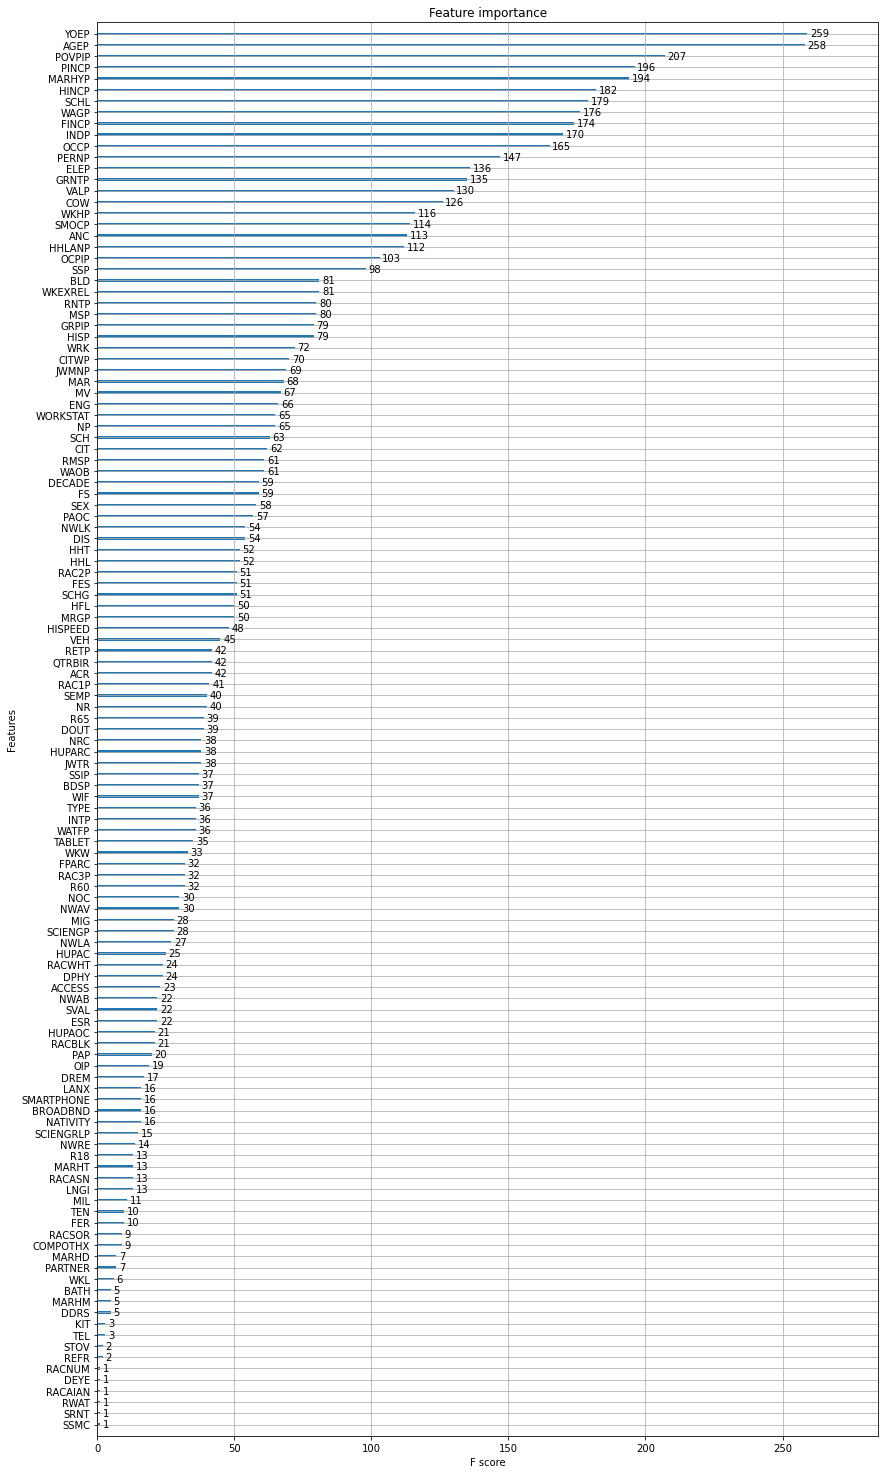

In [122]:
fig, ax = plt.subplots(figsize=(14,26))
xgb.plot_importance(bst, ax = ax, importance_type='weight')

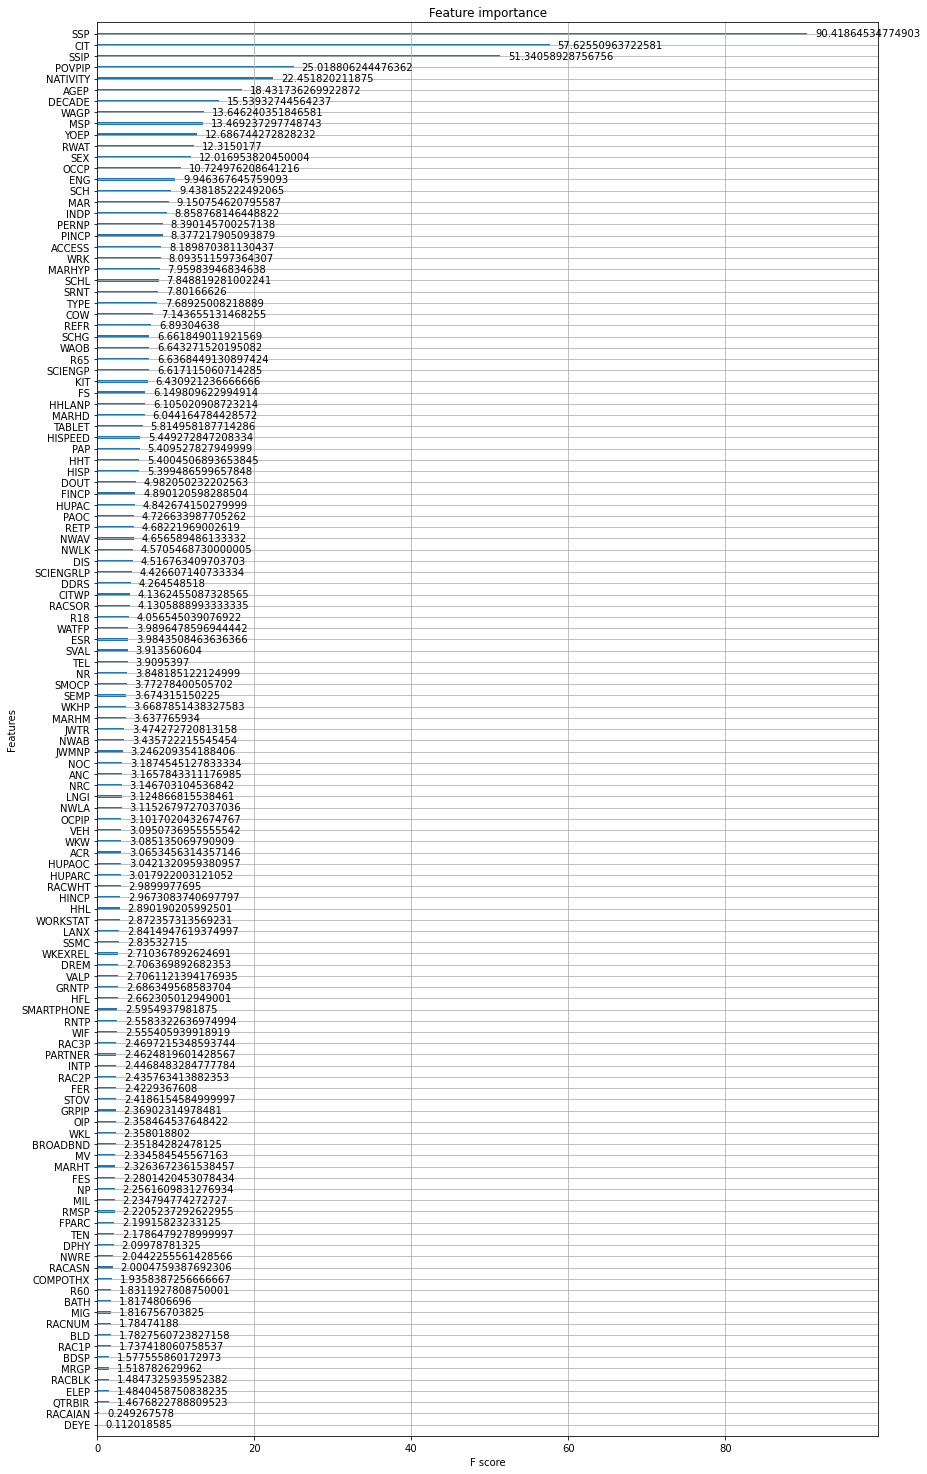

In [123]:
fig, ax = plt.subplots(figsize=(14,26))
xgb.plot_importance(bst, ax = ax, importance_type='gain')

In [259]:
_marhm_splits

,SplitValue,Count
0,23.540035,4.0
1,32.080070,20.0
2,40.620104,1.0
3,49.160139,22.0
4,57.700174,21.0
...,...,...
692,9622.539164,13.0
693,9631.079199,42.0
694,9639.619234,4.0
695,9648.159269,42.0


Text(0.5, 1.0, "Split Value Counts for 'MARHYP'(Years Married)")

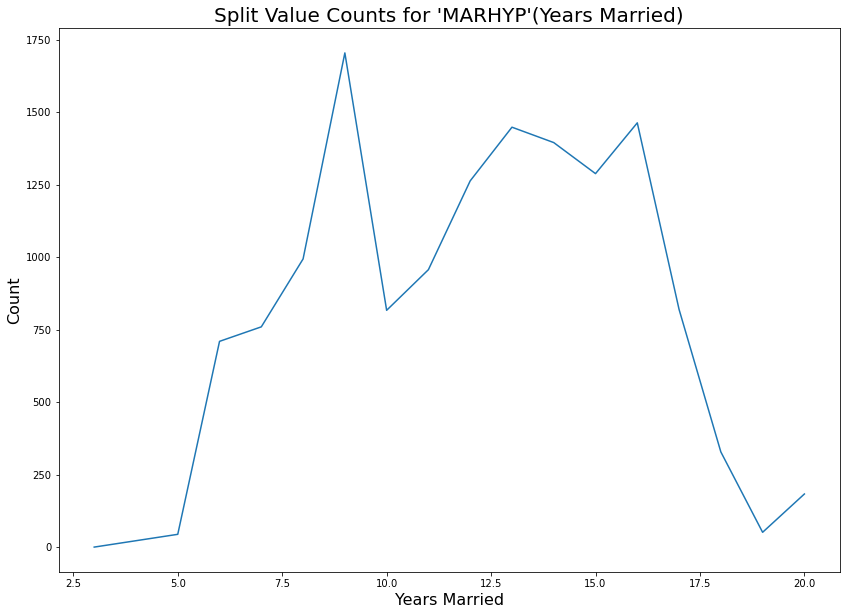

In [48]:
_marhm_splits = bst.get_split_value_histogram('INDP')
fig, ax = plt.subplots(figsize=(14,10))
ax.plot(_marhm_splits['SplitValue'],_marhm_splits['Count'])
ax.set_xlabel('Years Married', fontsize =16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Split Value Counts for \'MARHYP\'(Years Married)', fontsize=20)

In [351]:
_albert_indp = df_merge.groupby(['INDP'])['HICOV'].value_counts(normalize=True)
df_merge.loc[df_merge['INDP'].eq(770)]['HICOV'].value_counts()

1    5492
0     841
Name: HICOV, dtype: int64

In [337]:
_marhm_splits

,SplitValue,Count
0,2.75,150.0
1,3.50,185.0
2,4.25,241.0
3,5.00,612.0


Text(0.5, 1.0, "Split Value Counts for 'MARHYP'(Years Married)")

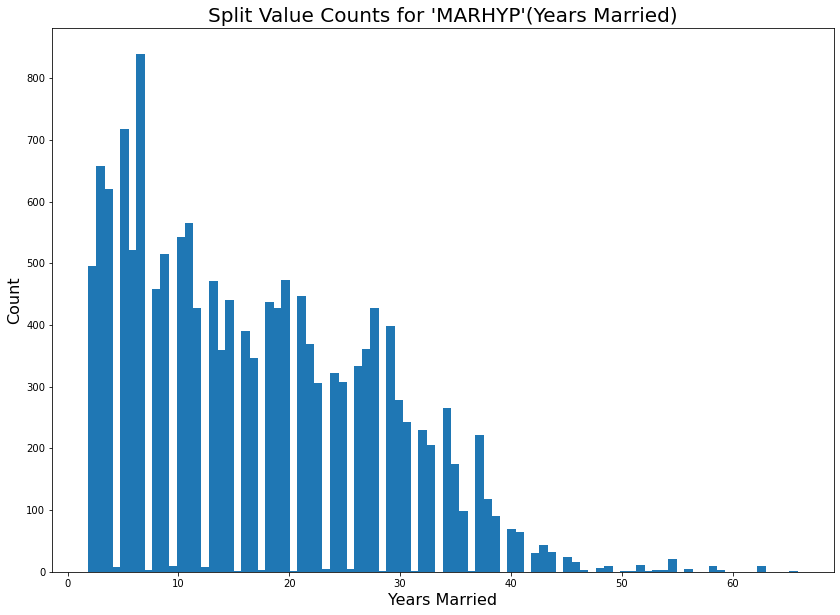

In [49]:
_marhm_splits = bst.get_split_value_histogram('MARHYP')
fig, ax = plt.subplots(figsize=(14,10))
ax.bar(_marhm_splits['SplitValue'],_marhm_splits['Count'])
ax.set_xlabel('Years Married', fontsize =16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Split Value Counts for \'MARHYP\'(Years Married)', fontsize=20)

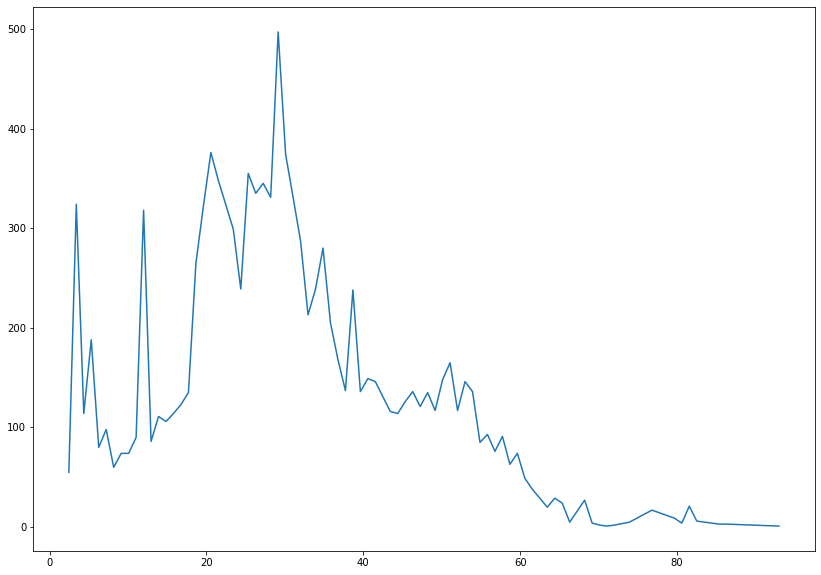

In [320]:
_marhm_splits = bst.get_split_value_histogram('YOEP')
fig, ax = plt.subplots(figsize=(14,10))
plt.plot(_marhm_splits['SplitValue'],_marhm_splits['Count'])

Text(0.5, 1.0, "Split value Counts for XGBoost on 'AGEP'")

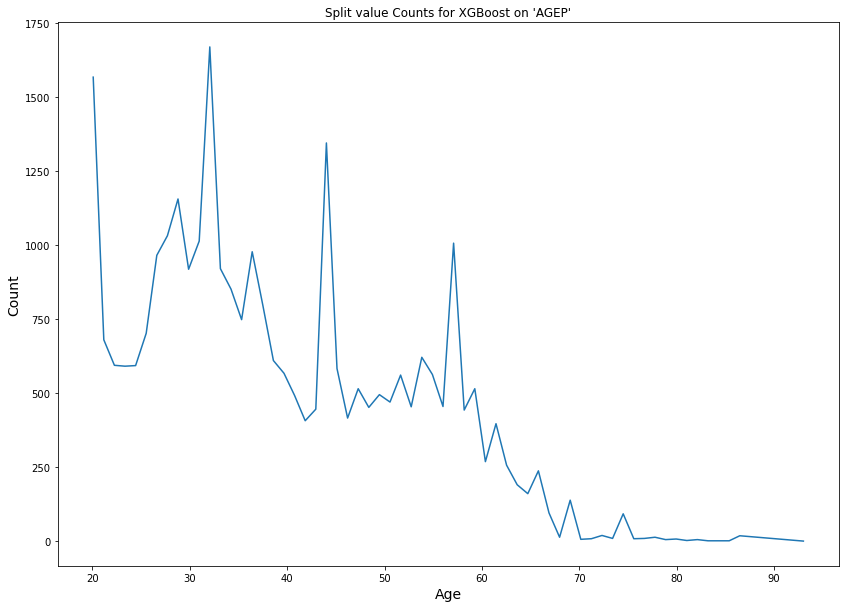

In [50]:
_marhm_splits = bst.get_split_value_histogram('AGEP')
fig, ax = plt.subplots(figsize=(14,10))
ax.plot(_marhm_splits['SplitValue'],_marhm_splits['Count'])
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Split value Counts for XGBoost on \'AGEP\'')

In [323]:
_marhm_splits.loc[_marhm_splits['Count'].eq(max(_marhm_splits['Count']))]

,SplitValue,Count
9,30.044776,722.0


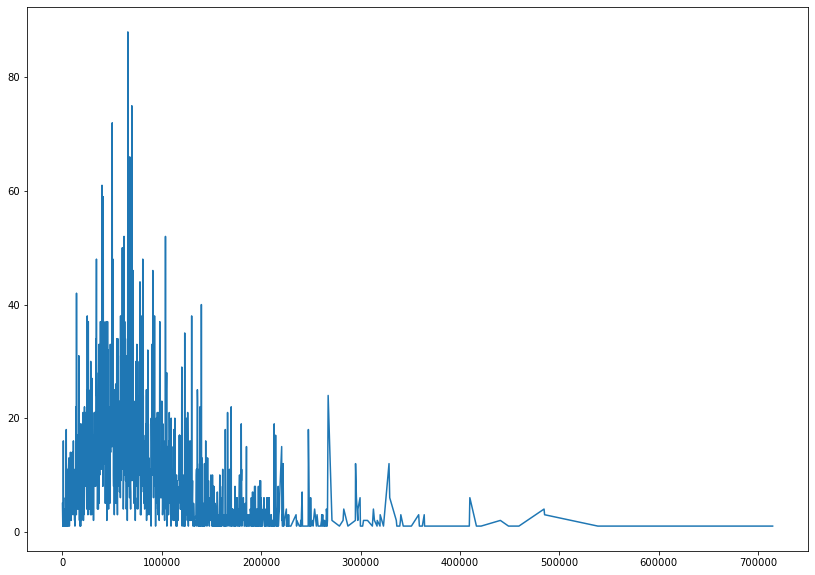

In [315]:
_marhm_splits = bst.get_split_value_histogram('HINCP')
fig, ax = plt.subplots(figsize=(14,10))
plt.plot(_marhm_splits['SplitValue'],_marhm_splits['Count'])

In [318]:
_marhm_splits.sort_values('Count').tail(50)

,SplitValue,Count
335,60020.576172,31.0
189,34553.093262,31.0
314,56357.445068,31.0
87,16586.307373,31.0
255,46065.791016,32.0
336,60195.010986,32.0
483,86011.363525,32.0
268,48333.443604,33.0
223,40483.876953,33.0
421,75021.970215,33.0


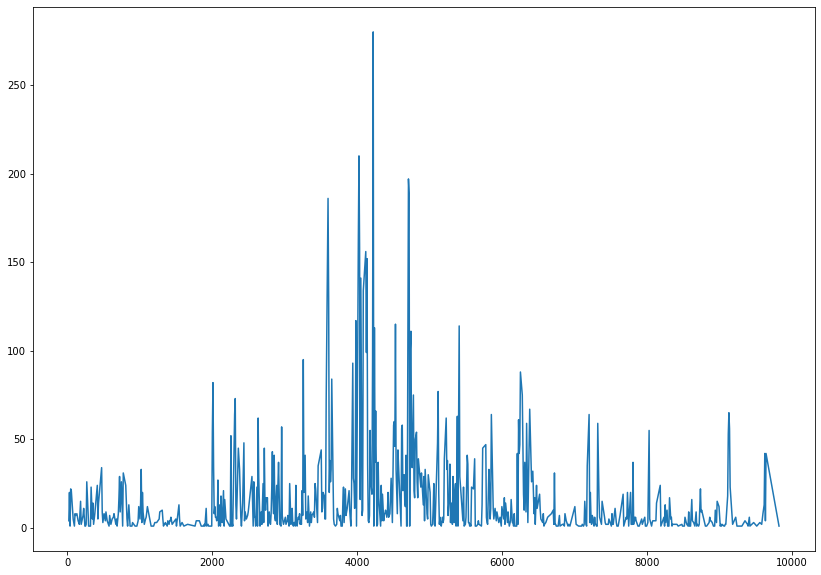

In [267]:
_marhm_splits = bst.get_split_value_histogram('OCCP')
fig, ax = plt.subplots(figsize=(14,10))
plt.plot(_marhm_splits['SplitValue'],_marhm_splits['Count'])

In [314]:
df_merge.loc[df_merge['OCCP'].eq(4000)]['HICOV'].value_counts()

1    385
0     89
Name: HICOV, dtype: int64

In [294]:
pd.set_option('display.max_rows', 1000)
_albert_occp = df_merge.groupby(['OCCP'])['HICOV'].value_counts(normalize=True)
_albert_occp.sort_values()

OCCP    HICOV
1530.0  0        0.003205
1760.0  0        0.004673
1825.0  0        0.005435
3090.0  0        0.005952
4800.0  0        0.006757
1460.0  0        0.006993
2330.0  0        0.007220
3010.0  0        0.008065
850.0   0        0.008621
3150.0  0        0.008772
3300.0  0        0.009259
3740.0  0        0.009852
2435.0  0        0.010417
2320.0  0        0.010542
2400.0  0        0.010989
5550.0  0        0.011070
650.0   0        0.011628
1220.0  0        0.012346
6660.0  0        0.012346
5420.0  0        0.012658
5165.0  0        0.012739
3258.0  0        0.012903
350.0   0        0.013133
1360.0  0        0.013514
9830.0  0        0.014085
705.0   0        0.014151
3870.0  0        0.014474
1105.0  0        0.014925
540.0   0        0.014925
2100.0  0        0.014981
1555.0  0        0.015385
600.0   0        0.015625
565.0   0        0.015873
845.0   0        0.016194
1021.0  0        0.016234
3245.0  0        0.016393
5140.0  0        0.016667
10.0    0        0.01684

In [ ]:
dtrain = xgb.DMatrix(data = xgb_X_train, label = xgb_y_valid)

In [ ]:
plt.plot()

In [176]:
df_merge

,AGEP,CIT,CITWP,COW,DDRS,DEAR,DEYE,DOUT,DPHY,DREM,ENG,FER,INTP,JWMNP,JWTR,LANX,MAR,MARHD,MARHM,MARHT,MARHW,MARHYP,MIG,MIL,NWAB,NWAV,NWLA,NWLK,NWRE,OIP,PAP,RETP,SCH,SCHG,SCHL,SEMP,SEX,SSIP,SSP,WAGP,WKHP,WKL,WKW,WRK,YOEP,ANC,ANC1P,ANC2P,DECADE,DIS,ESR,FOD1P,HICOV,HISP,INDP,LANP,MSP,NATIVITY,OCCP,PAOC,PERNP,PINCP,POVPIP,QTRBIR,RAC1P,RAC2P,RAC3P,RACAIAN,RACASN,RACBLK,RACNH,RACNUM,RACPI,RACSOR,RACWHT,SCIENGP,SCIENGRLP,WAOB,NP,TYPE,ACCESS,ACR,BATH,BDSP,BLD,BROADBND,COMPOTHX,ELEP,FS,HFL,HISPEED,MRGP,REFR,RMSP,RNTP,RWAT,RWATPR,SINK,SMARTPHONE,STOV,TABLET,TEL,TEN,VALP,VEH,WATFP,FES,FINCP,FPARC,GRNTP,GRPIP,HHL,HHLANP,HHT,HINCP,HUPAC,HUPAOC,HUPARC,KIT,LNGI,MV,NOC,NR,NRC,OCPIP,PARTNER,R18,R60,R65,SMOCP,SRNT,SSMC,SVAL,WIF,WKEXREL,WORKSTAT
0,26,5,0.0,2.0,2.0,2,2,2.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,5,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,5.0,3.0,3.0,3.0,0.0,0.0,0.0,3.0,16.0,21.0,0.0,2,0.0,0.0,5200.0,50.0,1.0,6.0,0.0,2.0,1,26,999,8.0,2,6.0,2601.0,1,1,7890.0,1170.0,6.0,2,5110.0,0.0,5200.0,5200.0,0.0,4,1,1,1,0,0,0,0,1,0,0,1,1.0,2.0,5,1,3,3.0,0.0,2.0,0.0,0.0,2.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,5.0,2.0,3.0,3.0,0.0,2.0,3.0,2.0,0.0,0.0,0.0
1,21,1,0.0,1.0,2.0,2,2,2.0,2.0,2.0,0.0,0.0,0.0,2.0,10.0,2.0,5,0.0,0.0,0.0,0.0,0.0,3.0,4.0,3.0,5.0,3.0,3.0,3.0,0.0,0.0,0.0,2.0,15.0,20.0,0.0,1,0.0,0.0,1000.0,2.0,1.0,5.0,1.0,21.0,1,51,999,0.0,2,1.0,1000.0,1,1,8680.0,0.0,6.0,1,4110.0,0.0,1000.0,1000.0,0.0,2,1,1,1,0,0,0,0,1,0,0,1,0.0,0.0,1,1,3,3.0,0.0,2.0,0.0,0.0,2.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,5.0,2.0,3.0,3.0,0.0,2.0,3.0,2.0,0.0,0.0,0.0
2,18,2,0.0,1.0,2.0,2,2,2.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,5,0.0,0.0,0.0,0.0,0.0,3.0,4.0,2.0,5.0,2.0,2.0,2.0,0.0,0.0,0.0,2.0,15.0,16.0,0.0,2,0.0,0.0,0.0,0.0,2.0,7.0,2.0,18.0,1,275,999,7.0,2,6.0,1000.0,1,2,8680.0,1200.0,6.0,1,4720.0,0.0,0.0,0.0,0.0,3,8,67,15,0,0,0,0,1,0,1,0,0.0,0.0,2,1,3,3.0,0.0,2.0,0.0,0.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,5.0,2.0,3.0,3.0,0.0,2.0,3.0,2.0,0.0,0.0,0.0
3,85,1,0.0,10.0,1.0,1,2,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2,2.0,2.0,1.0,2.0,69.0,1.0,4.0,3.0,5.0,3.0,3.0,3.0,0.0,0.0,0.0,1.0,0.0,16.0,0.0,2,0.0,13700.0,0.0,0.0,3.0,7.0,0.0,85.0,4,999,999,0.0,1,6.0,1000.0,1,1,100.0,0.0,3.0,1,0.0,0.0,0.0,13700.0,0.0,3,1,1,1,0,0,0,0,1,0,0,1,0.0,0.0,1,1,2,3.0,0.0,2.0,0.0,0.0,2.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,5.0,2.0,3.0,3.0,0.0,2.0,3.0,2.0,0.0,0.0,0.0
4,19,1,0.0,1.0,2.0,2,2,2.0,2.0,2.0,0.0,2.0,0.0,5.0,1.0,2.0,5,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,5.0,3.0,3.0,3.0,0.0,0.0,0.0,3.0,15.0,19.0,0.0,2,0.0,0.0,870.0,4.0,1.0,5.0,1.0,19.0,2,50,425,0.0,2,1.0,1000.0,1,1,8590.0,0.0,6.0,1,2723.0,0.0,870.0,870.0,0.0,4,1,1,1,0,0,0,0,1,0,0,1,0.0,0.0,1,1,3,3.0,0.0,2.0,0.0,0.0,2.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,5.0,2.0,3.0,3.0,0.0,2.0,3.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159294,36,1,0.0,1.0,2.0,2,2,2.0,2.0,2.0,0.0,2.0,0.0,45.0,4.0,2.0,1,2.0,2.0,1.0,2.0,8.0,1.0,4.0,3.0,5.0,3.0,3.0,3.0,0.0,0.0,0.0,1.0,0.0,22.0,0.0,2,

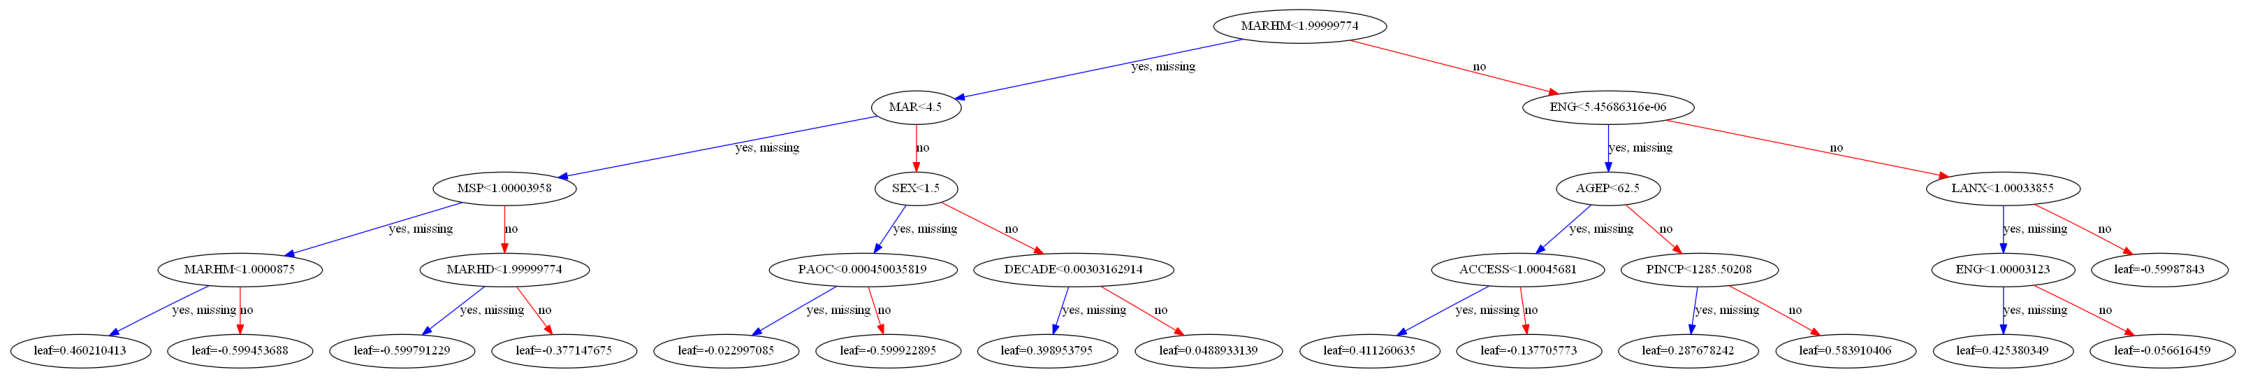

In [113]:
fig, ax = plt.subplots(figsize=(40,40))
xgb.plot_tree(bst, ax=ax)

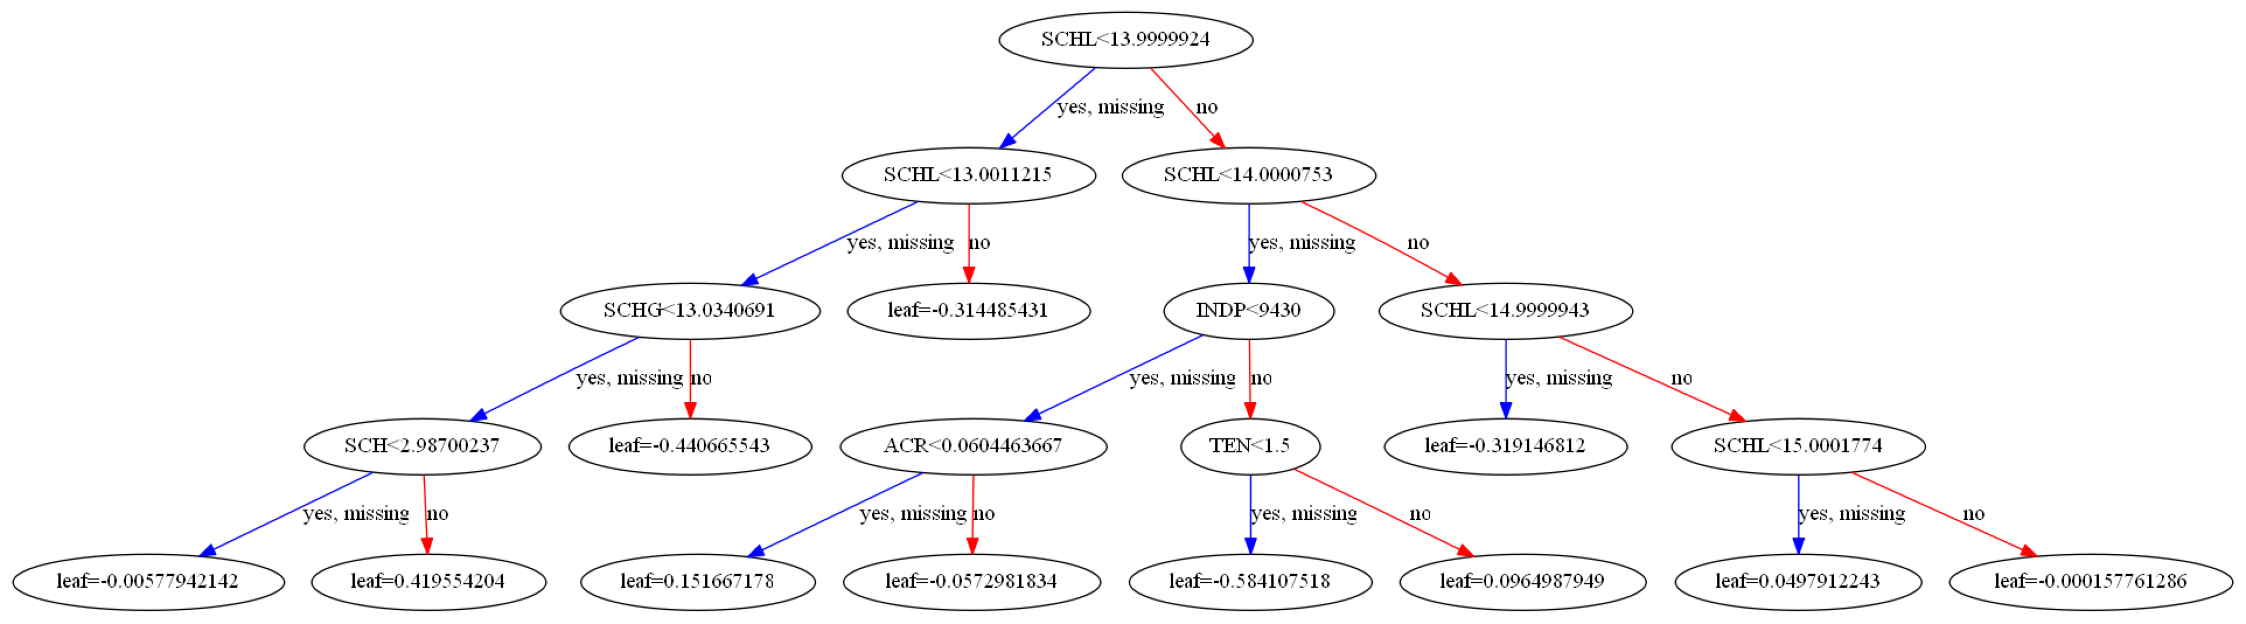

In [115]:
fig, ax = plt.subplots(figsize=(40,40))
xgb.plot_tree(bst, num_trees=199, ax=ax)